In [6]:
import numpy as np 
from scipy.special import binom
import matplotlib.pyplot as plt
import random

In [7]:
%matplotlib inline

In [16]:
WIDTH, HEIGHT = 224, 224
n_points  = 100 
coords_ = []

for el in range(n_points):
    coords_.append((random.choice(range(WIDTH) ), random.choice(range( HEIGHT))))

In [18]:
coords_

[(79, 13),
 (181, 53),
 (147, 162),
 (193, 176),
 (87, 163),
 (221, 163),
 (163, 210),
 (39, 170),
 (134, 176),
 (155, 124),
 (154, 145),
 (69, 9),
 (157, 138),
 (214, 91),
 (114, 9),
 (89, 0),
 (85, 186),
 (19, 72),
 (7, 181),
 (2, 177),
 (40, 152),
 (23, 213),
 (178, 190),
 (47, 98),
 (216, 32),
 (108, 136),
 (27, 173),
 (140, 94),
 (197, 160),
 (108, 128),
 (63, 179),
 (92, 115),
 (155, 199),
 (182, 50),
 (81, 23),
 (134, 204),
 (202, 118),
 (33, 204),
 (120, 217),
 (184, 156),
 (185, 84),
 (101, 190),
 (212, 203),
 (198, 185),
 (165, 95),
 (223, 48),
 (53, 159),
 (196, 87),
 (49, 149),
 (84, 35),
 (170, 162),
 (63, 5),
 (140, 110),
 (51, 124),
 (120, 110),
 (117, 11),
 (214, 16),
 (178, 20),
 (143, 192),
 (160, 219),
 (73, 153),
 (164, 141),
 (106, 94),
 (60, 64),
 (16, 213),
 (25, 8),
 (190, 164),
 (178, 209),
 (5, 139),
 (127, 25),
 (147, 137),
 (17, 83),
 (59, 120),
 (13, 66),
 (150, 66),
 (184, 71),
 (150, 47),
 (208, 107),
 (98, 113),
 (159, 167),
 (148, 106),
 (171, 136),
 (7

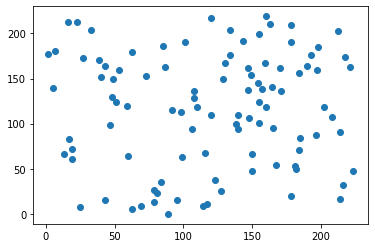

In [22]:
_ixes = [x[0] for x in coords_]
_ys = [y[1] for y in coords_]
plt.scatter(_ixes,_ys)

In [30]:
bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

In [31]:
bernstein

<function __main__.<lambda>(n, k, t)>

In [35]:
binom(2,1)

2.0

In [28]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt


bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

def bezier(points, num=200):
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for i in range(N):
        curve += np.outer(bernstein(N - 1, i, t), points[i])
    return curve

class Segment():
    def __init__(self, p1, p2, angle1, angle2, **kw):
        self.p1 = p1; self.p2 = p2
        self.angle1 = angle1; self.angle2 = angle2
        self.numpoints = kw.get("numpoints", 100)
        r = kw.get("r", 0.3)
        d = np.sqrt(np.sum((self.p2-self.p1)**2))
        self.r = r*d
        self.p = np.zeros((4,2))
        self.p[0,:] = self.p1[:]
        self.p[3,:] = self.p2[:]
        self.calc_intermediate_points(self.r)

    def calc_intermediate_points(self,r):
        self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
                                    self.r*np.sin(self.angle1)])
        self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
                                    self.r*np.sin(self.angle2+np.pi)])
        self.curve = bezier(self.p,self.numpoints)


def get_curve(points, **kw):
    segments = []
    for i in range(len(points)-1):
        seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
        segments.append(seg)
    curve = np.concatenate([s.curve for s in segments])
    return segments, curve

def ccw_sort(p):
    d = p-np.mean(p,axis=0)
    s = np.arctan2(d[:,0], d[:,1])
    return p[np.argsort(s),:]

def get_bezier_curve(a, rad=0.2, edgy=0):
    """ given an array of points *a*, create a curve through
    those points. 
    *rad* is a number between 0 and 1 to steer the distance of
          control points.
    *edgy* is a parameter which controls how "edgy" the curve is,
           edgy=0 is smoothest."""
    p = np.arctan(edgy)/np.pi+.5
    a = ccw_sort(a)
    a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
    d = np.diff(a, axis=0)
    ang = np.arctan2(d[:,1],d[:,0])
    f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
    ang = f(ang)
    ang1 = ang
    ang2 = np.roll(ang,1)
    ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
    ang = np.append(ang, [ang[0]])
    a = np.append(a, np.atleast_2d(ang).T, axis=1)
    s, c = get_curve(a, r=rad, method="var")
    x,y = c.T
    return x,y, a


def get_random_points(n=5, scale=0.8, mindst=None, rec=0):
    """ create n random points in the unit square, which are *mindst*
    apart, then scale them."""
    mindst = mindst or .7/n
    a = np.random.rand(n,2)
    d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
    if np.all(d >= mindst) or rec>=200:
        return a*scale
    else:
        return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)

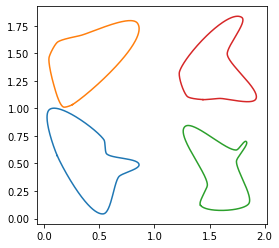

In [29]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

rad = 0.2
edgy = 0.05

for c in np.array([[0,0], [0,1], [1,0], [1,1]]):

    a = get_random_points(n=7, scale=1) + c
    x,y, _ = get_bezier_curve(a,rad=rad, edgy=edgy)
    plt.plot(x,y)

plt.show()